## Исследование рынка российского кинопроката



Заказчик - Министерство культуры Российской Федерации

Цель исследования: изучение рынка российского кинопроката, выявление тенденций, оценка интереса зрителя к фильмам,получившим гос. поддержку.

План работы:
- открыть файлы, объединить в один дата фрейм без потери информации
- произвести предобработку данных (проверка типов данных, пропусков, дубликатов, аномалий, добавить новые столбцы, необходимые для анализа)
- исследовательский анализ данных в общем
- исследовательский анализ фильмов с гос. поддержкой

### Шаг 1. Загрузка файлов, объединение их в один дата фрейм



In [218]:
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)

In [219]:
data_movies = pd.read_csv('/datasets/mkrf_movies.csv')
data_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [220]:
data_shows = pd.read_csv('/datasets/mkrf_shows.csv')
data_shows.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [221]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [222]:
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [223]:
data_movies['puNumber'] = pd.to_numeric(data_movies['puNumber'], errors='coerce')
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [224]:
data_movies['puNumber'].isna().sum()

1

In [225]:
data_movies = data_movies.loc[data_movies['puNumber'].notna()]
data_movies['puNumber'].isna().sum()

0

In [226]:
data_movies = data_movies.astype({'puNumber':'int'})
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [227]:
data = data_movies.merge(data_shows, on='puNumber', how='left')
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_



В данном разделе проекта были загружены два датасета и объединены в один общий по признаку "номер прокатного удостоверения".

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверка типов данных



In [229]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ') 
data['show_start_date'].head()

0   2015-11-27 12:00:00
1   2016-09-13 12:00:00
2   2016-10-10 12:00:00
3   2016-06-10 12:00:00
4   2015-07-29 12:00:00
Name: show_start_date, dtype: datetime64[ns]

In [230]:
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

#### Шаг 2.2. Изучение пропусков в датафрейме



In [231]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   995
genres                    975
box_office               4327
dtype: int64

In [232]:
data[['refundable_support', 'nonrefundable_support', 'budget', 'financing_source']] = data[['refundable_support', 'nonrefundable_support', 'budget', 'financing_source']].fillna(0)
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                      0
financing_source            0
ratings                   995
genres                    975
box_office               4327
dtype: int64

Заменила пропуски в столбцах, связанных с гос финансированием на нули, тк финансирования не было - его размер составил 0 рублей.

In [233]:
data[['film_studio', 'production_country', 'director', 'producer', 'genres']] = data[['film_studio', 'production_country', 'director', 'producer', 'genres']].fillna('unknown')
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                      0
financing_source            0
ratings                   995
genres                      0
box_office               4327
dtype: int64

Пропуски в текстовых значениях заполнила 'unknown', числовые (рейтинги и сборы) оставила пустыми. 

#### Шаг 2.3. Изучение дубликатов в датафрейме


In [234]:
data['year'] = pd.DatetimeIndex(data['show_start_date']).year
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,0,7.20,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0.00,0.00,0.00,0,6.60,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,0,6.80,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,0,6.80,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,0,6.80,"фантастика,боевик,триллер",NaN,2015


In [235]:
data.loc[data.duplicated(subset = ['title', 'year', 'director'])].count()

title                    388
puNumber                 388
show_start_date          388
type                     388
film_studio              388
production_country       388
director                 388
producer                 388
age_restriction          388
refundable_support       388
nonrefundable_support    388
budget                   388
financing_source         388
ratings                  382
genres                   388
box_office                69
year                     388
dtype: int64

In [236]:
data = data.drop_duplicates(subset=['title', 'director', 'year'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7097 entries, 0 to 7484
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7097 non-null   object        
 1   puNumber               7097 non-null   int64         
 2   show_start_date        7097 non-null   datetime64[ns]
 3   type                   7097 non-null   object        
 4   film_studio            7097 non-null   object        
 5   production_country     7097 non-null   object        
 6   director               7097 non-null   object        
 7   producer               7097 non-null   object        
 8   age_restriction        7097 non-null   object        
 9   refundable_support     7097 non-null   float64       
 10  nonrefundable_support  7097 non-null   float64       
 11  budget                 7097 non-null   float64       
 12  financing_source       7097 non-null   object        
 13  rat

Удалила строки, где совпадало название фильма, имя режисера и год выхода в прокат. Данные дубликаты могли возникнуть в следствие разных номеров прокатных удостоверений

In [237]:
data.duplicated(subset=['puNumber']).sum()

0


Дубликаты по прокатному удостоверению не найдено


#### Шаг 2.4. Изучение категориальных значений



In [238]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [239]:
data['type'] = data['type'].str.strip()

In [240]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [241]:
data['financing_source'].unique()

array([0, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [242]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [243]:
data.groupby('age_restriction')['title'].count()

age_restriction
«0+» - для любой зрительской аудитории     771
«12+» - для детей старше 12 лет           1531
«16+» - для детей старше 16 лет           2638
«18+» - запрещено для детей               1537
«6+» - для детей старше 6 лет              620
Name: title, dtype: int64

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7097 entries, 0 to 7484
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7097 non-null   object        
 1   puNumber               7097 non-null   int64         
 2   show_start_date        7097 non-null   datetime64[ns]
 3   type                   7097 non-null   object        
 4   film_studio            7097 non-null   object        
 5   production_country     7097 non-null   object        
 6   director               7097 non-null   object        
 7   producer               7097 non-null   object        
 8   age_restriction        7097 non-null   object        
 9   refundable_support     7097 non-null   float64       
 10  nonrefundable_support  7097 non-null   float64       
 11  budget                 7097 non-null   float64       
 12  financing_source       7097 non-null   object        
 13  rat

#### Шаг 2.5. Проверка количественных значений



In [245]:
data.query('budget < (refundable_support + nonrefundable_support)')


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
2052,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10",2014
2057,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00",2015
2471,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40",2015
2531,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80",2015
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40",2015
2683,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51",2015
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20",2015
2873,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43",2016
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00",2016
3564,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00",2016


In [246]:
data.loc[data['budget']< (data['refundable_support'] + data['nonrefundable_support']), 'budget'] = (data['refundable_support'] + data['nonrefundable_support'])
data.query('budget < (refundable_support + nonrefundable_support) ')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year


В данном датасете бюджет включает в себя средства гос поддержки, значит бюджет не может быть меньше суммы средств гос финансирования.

In [247]:
data['refundable_support'].describe()

count         7,097.00
mean        555,023.25
std       5,936,104.70
min               0.00
25%               0.00
50%               0.00
75%               0.00
max     180,000,000.00
Name: refundable_support, dtype: float64

In [248]:
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

In [249]:
data['ratings'].describe()

count   6,108.00
mean        6.47
std         1.11
min         1.00
25%         5.90
50%         6.60
75%         7.20
max         9.20
Name: ratings, dtype: float64

In [250]:
data['box_office'].describe()

count           3,089.00
mean       75,181,676.09
std       237,509,239.13
min                 0.00
25%            95,650.00
50%         2,351,960.00
75%        23,463,406.90
max     3,073,568,690.79
Name: box_office, dtype: float64

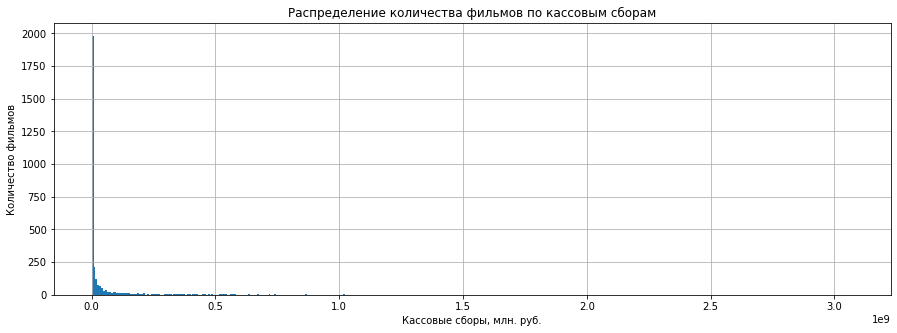

In [251]:
data['box_office'].hist(figsize=(15,5),  bins=400)
plt.xlabel('Кассовые сборы, млн. руб.')
plt.ylabel('Количество фильмов')
plt.title('Распределение количества фильмов по кассовым сборам')
plt.show();


В сборах много нулевых, или близких к нулю значений, при этом есть выбивающиеся фильмы, собравшие 3 млрд. руб.    
    


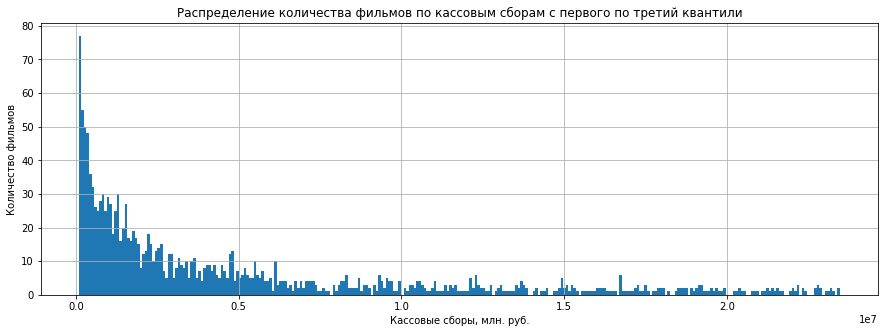

In [252]:
data['box_office'].hist(figsize=(15,5), range=(95650,23463406), bins=300)
plt.xlabel('Кассовые сборы, млн. руб.')
plt.ylabel('Количество фильмов')
plt.title('Распределение количества фильмов по кассовым сборам с первого по третий квантили')
plt.show();



Гистограмма кассовых сборов с первого по третий квантили, большая часть значений находится до 2 млн. рублей.
    


#### Шаг 2.6. Создание новых столбцов





In [253]:
data.rename(columns = {'puNumber':'pu_number'}, inplace=True)
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,0,7.20,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0.00,0.00,0.00,0,6.60,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,0,6.80,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,0,6.80,"фантастика,боевик,триллер",NaN,2015
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,unknown,«6+» - для детей старше 6 лет,0.00,0.00,0.00,0,7.70,драма,NaN,2016


In [254]:
#функция возвращает первое значение среди режисеров
def main_director(row):
    director = row.split(',')
    return director[0]
 
data['main_director'] = data['director'].apply(main_director)

In [255]:
#функция возвращает первое значение в жанре
def main_genre(row):
    genre = row.split(',')
    return genre[0]
 
data['main_genre'] = data['genres'].apply(main_genre)

In [256]:
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,0,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0.00,0.00,0.00,0,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,0,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,0,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,unknown,«6+» - для детей старше 6 лет,0.00,0.00,0.00,0,7.70,драма,NaN,2016,В.Абдрашитов,драма


In [257]:
#расчет доли гос средств в общем бюджете фильма
data['proportion'] = (data['nonrefundable_support'] + data['refundable_support'])/data['budget']
data.query('budget!=0').head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,proportion
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,0.33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,NaN,unknown,"28,140.00",2014,А.Якимчук,unknown,0.70
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,0.61
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",2014,М.Угаров,драма,0.62




Произведена предобработка данных: данные в датафрейме приведены к корректному типу, изучены и заполнены пропуски там, где это необходимо, проведена работа с дубликатами (под дубликатами в данном случаи понимались объекты, где совпадали название фильма, имя режисера и год выхода), изучены категориальные и количественные значения, добавлены новые столбцы.   


### Шаг 3. Исследовательский анализ данных


#### Анализ фильмов вышедших в прокат

In [258]:
data['box_office'] = data['box_office'].fillna(0)
data['rental'] = data['box_office']!=0 
data.head(10)


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,proportion,rental
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,...,0.00,0,7.20,"боевик,драма,мелодрама",0.00,2015,Кевин Костнер,боевик,NaN,False
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0.00,...,0.00,0,6.60,"драма,военный",0.00,2016,Е.Матвеев,драма,NaN,False
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,...,0.00,0,6.80,"фантастика,боевик,триллер",0.00,2016,Тимур Бекмамбетов,фантастика,NaN,False
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,...,0.00,0,6.80,"фантастика,боевик,триллер",0.00,2015,Тимур Бекмамбетов,фантастика,NaN,False
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,unknown,«6+» - для детей старше 6 лет,0.00,...,0.00,0,7.70,драма,0.00,2016,В.Абдрашитов,драма,NaN,False
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,unknown,«12+» - для детей старше 12 лет,0.00,...,0.00,0,8.30,"мелодрама,комедия","2,700.00",2013,В.Меньшов,мелодрама,NaN,True
7,Любовь и сигареты,221074614,2014-12-29 12:00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,0.00,...,0.00,0,6.60,"мюзикл,мелодрама,комедия",0.00,2014,Джон Туртурро,мюзикл,NaN,False
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,0.00,...,0.00,0,8.00,"комедия,криминал",0.00,2016,Эрик Беснард,комедия,NaN,False
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,unknown,«12+» - для детей старше 12 лет,0.00,...,0.00,0,7.80,"мелодрама,комедия",0.00,2014,В.Титов,мелодрама,NaN,False
10,Превосходство Борна /По одноименной новелле Ро...,221031416,2016-06-29 12:00:00,Художественный,"Кеннеди/Маршал Компани, Юниверсал Пикчерз, Гип...",США,Пол Грингросс,"Патрик Кроули, Фрэнк Маршалл, Пол Сэндберг",«16+» - для детей старше 16 лет,0.00,...,0.00,0,7.70,"боевик,триллер,детектив",0.00,2016,Пол Грингросс,боевик,NaN,False


In [260]:
in_rental = data.pivot_table(index='year', values='rental', aggfunc=['sum', 'count'])
in_rental

,sum,count
,rental,rental
year,,
2010,89,818
2011,105,558
2012,120,556
2013,177,615
2014,265,765
2015,448,688
2016,501,782
2017,357,505


Общее количество фильмов сопоставимо, а количество фильмов выходивших в прокат за исследуемый период значительно возросло.

In [261]:
in_rental.columns = ['rental', 'general']

In [262]:
in_rental['proportion'] = in_rental['rental']/in_rental['general']
in_rental

,rental,general,proportion
year,,,
2010,89,818,0.11
2011,105,558,0.19
2012,120,556,0.22
2013,177,615,0.29
2014,265,765,0.35
2015,448,688,0.65
2016,501,782,0.64
2017,357,505,0.71
2018,474,884,0.54


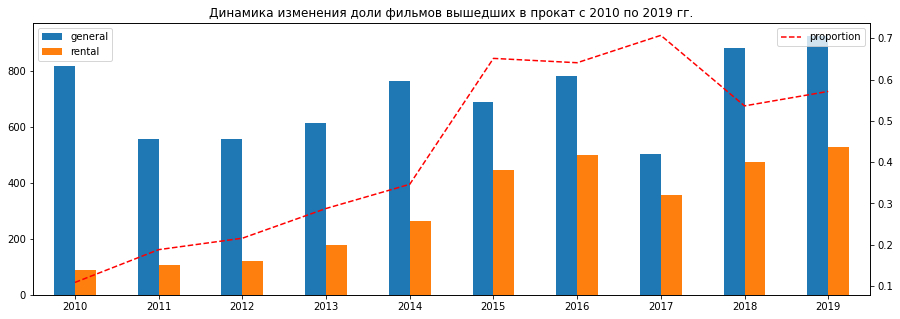

In [264]:
in_rental.reset_index(inplace = True)

ax = in_rental[['general', 'rental']]\
  .plot(kind = 'bar', figsize = (15,5))
labels = list(in_rental['year'].unique())

in_rental['proportion'].plot(secondary_y=True, color = 'red', linestyle = 'dashed')

ax.set_xticklabels(labels)
plt.xticks(rotation = 0)
plt.legend()
plt.title('Динамика изменения доли фильмов вышедших в прокат с 2010 по 2019 гг.')
plt.show()

Самая высокая доля фильмов вышедших в прокат 0,70 - за 2017 год. Но при этом в 2017 году также самое низкое значение вышедших фильмов всего. 

Самое высокое значение всего вышедших фильмов - показатель 2019года, из них 57% вышли в прокат.

#### Анализ динамики проката по годам

In [265]:
data.pivot_table(index='year', values='box_office', aggfunc='sum')

,box_office
year,
2010,"2,396,230.00"
2011,"14,091,440.00"
2012,"6,950,248.00"
2013,"29,798,766.20"
2014,"7,443,693,956.20"
2015,"36,034,896,104.90"
2016,"43,731,489,989.34"
2017,"48,563,707,217.51"
2018,"47,985,723,095.29"


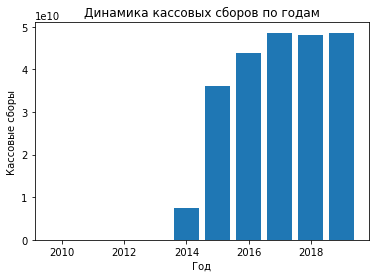

In [266]:
plt.bar(data.pivot_table(index='year', values='box_office', aggfunc='sum')
        .index, data.pivot_table(index='year', values='box_office', aggfunc='sum')['box_office']);

plt.xlabel('Год')
plt.ylabel('Кассовые сборы')
plt.title('Динамика кассовых сборов по годам')
plt.show()

С 2012 по 2019 гг наблюдается тенденция к росту кассовых сборов. Максимальная сумма сборов была в 2019 году и составила 48 млрд. руб., а самые низкие сборы из представленных данных были в 2010 году - 2,3 млн. руб. 

#### Анализ кассовых сборов

In [267]:
data.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
year,,
2010,"2,929.38",0.00
2011,"25,253.48",0.00
2012,"12,500.45",0.00
2013,"48,453.28",0.00
2014,"9,730,318.90",0.00
2015,"52,376,302.48","655,170.75"
2016,"55,922,621.47","457,455.00"
2017,"96,165,756.87","2,522,174.00"


Медианные значения значительно ниже средних, это связано с тем, что до 2015 года меньше 40% фильмов выходили в прокат, соответственно, медианное значение для 2010-2014гг - 0, также в последующих годах медиана сильно ниже средней, это связано с неоднородность сборов,какие то фильмы не собирают сумм даже чтобы покрыть собственные издержки, какие то окупаются в сотни раз, как раз из-за последних средняя имеет высокие значения. 

#### Анализ зависимости возрастных ограничений фильмов и кассовых сборов

In [268]:
aa = data.query('year>2014').pivot_table(index=['year', 'age_restriction'], values='box_office', aggfunc='sum')
aa

box_office
year age_restriction                                         
2015 «0+» - для любой зрительской аудитории    364,902,082.47
     «12+» - для детей старше 12 лет        13,616,082,008.91
     «16+» - для детей старше 16 лет         8,734,392,209.17
     «18+» - запрещено для детей             4,635,938,263.34
     «6+» - для детей старше 6 лет           8,683,581,541.01
2016 «0+» - для любой зрительской аудитории    150,228,848.67
     «12+» - для детей старше 12 лет        12,178,337,053.01
     «16+» - для детей старше 16 лет        14,359,349,614.80
     «18+» - запрещено для детей             4,990,430,064.62
     «6+» - для детей старше 6 лет          12,053,144,408.24
2017 «0+» - для любой зрительской аудитории    229,598,930.00
     «12+» - для детей старше 12 лет         7,851,427,660.67
     «16+» - для детей старше 16 лет        18,745,042,900.06
     «18+» - запрещено для детей             9,651,495,581.02
     «6+» - для детей старше 6 лет          12,086,142,145.76
2018 «0+» - для любой зрительской аудитории     32,449,002.11
     «12+» - для детей старше 12 лет        14,267,291,660.69
     «16+» - для детей старше 16 лет        14,820,922,307.93
     «18+» - запрещено для детей             8,760,085,501.15
     «6+» - для детей старше 6 лет          10,104,974,623.41
2019 «0+» - для любой зрительской аудитории     17,746,066.82
     «12+» - для детей старше 12 лет        12,680,198,773.67
     «16+» - для детей старше 16 лет        12,751,160,600.60
     «18+» - запрещено для детей            10,121,796,303.64
     «6+» - для детей старше 6 лет          12,852,548,650.86

In [269]:
import seaborn as sns

aa=aa.reset_index()


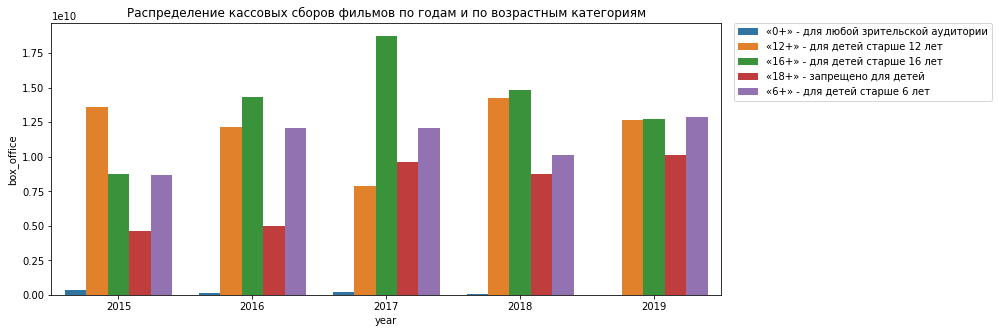

In [271]:
plt.figure(figsize = (12, 5))
sns.barplot(x="year",y="box_office",hue='age_restriction',data=aa)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) # размещение легенды

plt.title('Распределение кассовых сборов фильмов по годам и по возрастным категориям')

plt.show()

Есть некоторая зависимость кассовых сборов и возрастной категории фильма. 

В 2015 году самые высокие сборы получили фильмы с категорией 12+, самые низкие 0+. 

В 2016 самые высокие - 16+, низкие - 0+. 

в 2017 самые высокие - 16+, низкие - 0+.

В 2018 самые высокие сборы - 16+, низкие - 0+.

В 2019 самые высокие - 6+, низкие -0+.

То есть самые низкие сборы всегда у кино 0+, а самые высокие чаще у 16+, но бывают исключения, также стоит отметить, что 3 эти категории (6+, 12+ и 16+) имеют зачастую сопоставимые сборы и их размеры различаются не значительно. В принципе это объяснимо, тк фильмы каждой категории подходят под большие группы людей. Например, 6+ подходит для детей и родителей, но при этом от 0+ эти фильмы выгодно отличаются тем, что могут быть интересны детям возраста начальной школы, если ребенок младше, то не факт, что 1,5 часа фильма он сможет спокойно высидеть и не мешать другим людям в зале, т е люди с детьми младше 6 лет предпочтительнее выберут для своего ребенка другое развлечение, не кино. 12+ это подрост, большая категория с внушительным количеством свободного времени. 16+ - все остальные, тк большинство фильмов стараются влезть в эту категорию, чтобы не срезать себе аудиторию, соответственно, большинство фильмов для взрослой аудитории имеет такое органичение. 

### Шаг 4. Исследование фильмы, которые получили государственную поддержку



In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7097 entries, 0 to 7484
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7097 non-null   object        
 1   pu_number              7097 non-null   int64         
 2   show_start_date        7097 non-null   datetime64[ns]
 3   type                   7097 non-null   object        
 4   film_studio            7097 non-null   object        
 5   production_country     7097 non-null   object        
 6   director               7097 non-null   object        
 7   producer               7097 non-null   object        
 8   age_restriction        7097 non-null   object        
 9   refundable_support     7097 non-null   float64       
 10  nonrefundable_support  7097 non-null   float64       
 11  budget                 7097 non-null   float64       
 12  financing_source       7097 non-null   object        
 13  rat

In [273]:
data.query('refundable_support!=0 or nonrefundable_support!=0')['ratings'].mean()

6.002875399361023

Средний рейтинг фильма с господдержков (с 2013 по 2019гг) 6.

In [274]:
data.query('refundable_support==0 and nonrefundable_support==0 and year>2012' )['ratings'].mean()

6.451885856079405

А средний рейтинг фильмов без поддержки 6,5.

In [275]:
rtg = data.query('refundable_support!=0 or nonrefundable_support!=0').pivot_table(index='year', values='ratings')
rtg.columns=['ratings_with_support']
rtg

,ratings_with_support
year,
2013,6.70
2014,6.01
2015,6.06
2016,5.68
2017,6.00
2018,6.00
2019,6.19


In [276]:
rrtg = data.query('refundable_support==0 and nonrefundable_support==0').pivot_table(index='year', values='ratings')
rrtg.columns = ['ratings_without_support']
rrtg

,ratings_without_support
year,
2010,6.70
2011,6.50
2012,6.53
2013,6.51
2014,6.55
2015,6.36
2016,6.39
2017,6.35
2018,6.42


In [277]:
rrtg.join(rtg)

,ratings_without_support,ratings_with_support
year,,
2010,6.70,NaN
2011,6.50,NaN
2012,6.53,NaN
2013,6.51,6.70
2014,6.55,6.01
2015,6.36,6.06
2016,6.39,5.68
2017,6.35,6.00
2018,6.42,6.00


В среднем по годам рейтинг фильмов с гос поддержкой ниже, чем средний рейтинг без гос. поддерки, только в 2013 году (первый год, по которому у нас есть данные о гос поддержке) ситуация была обратной.

In [278]:
russ_support = data.query('(refundable_support!=0 or nonrefundable_support!=0) and production_country=="Россия"')

In [279]:
russ_support

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,proportion,rental
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,"79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,0.33,True
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,"37,142,857.00",Министерство культуры,NaN,unknown,"28,140.00",2014,А.Якимчук,unknown,0.70,True
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,"176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,0.61,True
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,"40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69,True
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,"40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",2014,М.Угаров,драма,0.62,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00",...,"980,000,000.00",Фонд кино,6.00,"история,биография,драма","717,703,185.53",2019,А.Кравчук,история,0.51,True
7465,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.00",...,"190,000,000.00",Фонд кино,6.70,"мультфильм,приключения,семейный","501,069,235.00",2019,Д.Шмидт,мультфильм,0.53,True
7473,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00",...,"944,000,000.00",Фонд кино,5.70,"фантастика,боевик",0.00,2019,Ф.Бондарчук,фантастика,0.53,False
7475,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,...,"46,154,000.00",Министерство культуры,5.90,драма,0.00,2019,И.Северов,драма,0.65,False


In [280]:
russ_no_support = data.query('refundable_support==0 and nonrefundable_support==0 and production_country=="Россия"')

In [281]:
russ_no_support

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,proportion,rental
336,Каникулы строгого режима,111008514,2014-08-07 12:00:00,Художественный,"ООО ""Кинобазза"" по заказу ЗАО ""Дирекция Кино""",Россия,И.Зайцев,"А.Максимов, Н.Попов, Д.Файзиев",«12+» - для детей старше 12 лет,0.00,...,0.00,0,7.10,"драма,комедия,приключения",360.00,2014,И.Зайцев,драма,NaN,True
462,Август. Восьмого,111000612,2012-02-07 12:00:00,Художественный,"ЗАО ""ПК ""ГЛАВКИНО""",Россия,Д.Файзиев,"Д.Файзиев, Ф.Бондарчук, И.Бачурин",«12+» - для детей старше 12 лет,0.00,...,0.00,0,6.10,"драма,военный","6,775.00",2012,Д.Файзиев,драма,NaN,True
463,Тот еще...!,111001612,2012-02-20 12:00:00,Художественный,"ООО ""Энджой мувиз""",Россия,С.Андреасян,Г.Малков,«12+» - для детей старше 12 лет,0.00,...,0.00,0,2.60,"фэнтези,комедия,семейный","12,779.00",2012,С.Андреасян,фэнтези,NaN,True
464,КОКОКО,111003112,2012-06-05 12:00:00,Художественный,"ООО Кинокомпания ""Глобус-фильм""",Россия,А.Смирнова,С.Сельянов,«18+» - запрещено для детей,0.00,...,0.00,0,6.90,"драма,комедия",200.00,2012,А.Смирнова,драма,NaN,True
469,Разговор,111000712,2012-02-07 12:00:00,Художественный,"ООО ""Кинокомпания ""КВФильм-Продакшн"", ООО ""Ком...",Россия,"В.Иванов, С.Комаров",В.Карев,«16+» - для детей старше 16 лет,0.00,...,0.00,0,7.60,"триллер,драма,детектив",0.00,2012,В.Иванов,триллер,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Fair play (Честная игра),211055919,2019-12-17 12:00:00,Художественный,ИП Сигал Екатерина Тенгизовна,Россия,Д.Кудрявцев,Е.Сигал,«16+» - для детей старше 16 лет,0.00,...,0.00,0,6.30,"боевик,триллер,драма",0.00,2019,Д.Кудрявцев,боевик,NaN,False
7466,Жёлтый клевер,111022219,2019-12-27 12:00:00,Художественный,Соломатина Людмила Леонидовна,Россия,Л.Соломатина (Томилова),Л.Соломатина (Томилова),«12+» - для детей старше 12 лет,0.00,...,0.00,0,NaN,unknown,0.00,2019,Л.Соломатина (Томилова),unknown,NaN,False
7469,Дикие и свободные,112004819,2019-12-23 12:00:00,Документальный,"АНО ""ТВ-Новости""",Россия,Н.Карачкова,В.Сенина,«6+» - для детей старше 6 лет,0.00,...,0.00,0,NaN,unknown,0.00,2019,Н.Карачкова,unknown,NaN,False
7474,Папа,111022919,2019-12-24 12:00:00,Художественный,"ООО ""Киношкола имени Сергея Федоровича Бондарч...",Россия,К.Чувикова,"ООО ""Киношкола имени Сергея Федоровича Бондарч...",«18+» - запрещено для детей,0.00,...,0.00,0,8.20,драма,0.00,2019,К.Чувикова,драма,NaN,False


In [282]:
rattt = russ_no_support.pivot_table(index='year', values='ratings')
rattt.columns = ['ratings_without_support']
ds = russ_support.pivot_table(index='year', values='ratings')
ds.columns = ['ratings_with_support']
rattt.join(ds)

,ratings_without_support,ratings_with_support
year,,
2010,6.01,NaN
2011,5.96,NaN
2012,6.11,NaN
2013,5.77,6.70
2014,6.07,5.96
2015,5.68,6.07
2016,6.00,5.66
2017,5.90,6.00
2018,6.48,5.98



Если проводить анализ рейтинга только российских фильмов с гос поддержкой и без, то картина следующая: в 2013 году (первый год, о котором у нас есть информация о фильмах с гос поддержкой) рейтинг фильмов, финансируемых государтвом, был значительно выше (на 0,93 балла), чем фильмов без поддержки. В последующие годы такой большой разницы рейтингов не наблюдалось, были годы, где выше средний рейтинг фильмов с гос поддержкой, было и наоборот. За 2018 и 2019гг рейтинг фильмов без гос поддержки был выше, чем фильмов с гос поддержкой на 0,5 и 0,29 соответственно.
    


In [283]:
data.query('refundable_support!=0 or nonrefundable_support!=0')
.pivot_table(index='main_genre', values='ratings', aggfunc=['count', 'mean'])

,count,mean
,ratings,ratings
main_genre,,
unknown,0,NaN
биография,3,6.90
боевик,6,6.58
военный,9,6.47
детектив,5,6.76
детский,4,7.12
драма,92,6.39
история,4,5.35


В основном фильмы с гос.поддержкой - драмы и комедии. При этом данные комедии имеют самый низкий средний рейтинг по жанрам в фильмах с гос поддержкой.

In [284]:
data.query('refundable_support!=0 or nonrefundable_support!=0 and main_genre=="комедия"')
.pivot_table(index='year', values=['ratings', 'box_office'], aggfunc=['mean', 'count'])

mean              count        
         box_office ratings box_office ratings
year                                          
2013  19,957,031.50    5.30          1       1
2014 173,316,542.56    5.40          5       5
2015  77,010,209.70    5.72         38      37
2016 124,679,654.50    5.46         34      33
2017 240,067,002.37    5.89         29      29
2018 328,921,564.31    5.67         23      22
2019 245,210,224.01    6.00         27      27

In [285]:
data.query('refundable_support!=0 or nonrefundable_support!=0 and main_genre=="комедия"')
.pivot_table(index='year', values= 'box_office', aggfunc=['sum', 'count'])

,sum,count
,box_office,box_office
year,,
2013,"19,957,031.50",1
2014,"866,582,712.80",5
2015,"2,926,387,968.44",38
2016,"4,239,108,252.90",34
2017,"6,961,943,068.76",29
2018,"7,565,195,979.04",23
2019,"6,620,676,048.30",27


С 2015 года около 30 фильмов жанра комедия имеют гос поддержку, суммарные кассовые сборы по годам имею тенденцию к росту.

In [286]:
data.query('refundable_support!=0 or nonrefundable_support!=0 and main_genre=="комедия"')
.pivot_table(index='main_director', values='ratings', aggfunc='count').sort_values(by='ratings', ascending=False)
.head(10)

,ratings
main_director,
Д.Дьяченко,4
Р.Давлетьяров,3
А.Цицилин,3
С.Подгаевский,2
А.Меликян,2
А.Матисон,2
Д.Киселев,2
С.Андреасян,2
А.Пармас,2


In [287]:
data.query('refundable_support!=0 or nonrefundable_support!=0 ')
.pivot_table(index='main_director', values='ratings', aggfunc='count').sort_values(by='ratings', ascending=False)
.head(10)

,ratings
main_director,
Р.Давлетьяров,5
Д.Дьяченко,4
С.Андреасян,4
Д.Шмидт,3
С.Мокрицкий,3
А.Цицилин,3
Н.Хомерики,3
К.Шипенко,3
А.Котт,3


Р.Давлетьяров - режисер 5 фильмов, которого получили гос поддержку за исследуемый период. Д.Дьяченко и С.Андреасян - режисеры, по 4 фильма которых получили гос поддержку. 

In [288]:
data.query('refundable_support!=0 or nonrefundable_support!=0 ')
.pivot_table(index=['year', 'age_restriction'], values='box_office', aggfunc=['sum',  'count'])

sum      count
                                                  box_office box_office
year age_restriction                                                   
2013 «12+» - для детей старше 12 лет           19,957,031.50          1
     «16+» - для детей старше 16 лет              365,353.60          1
2014 «0+» - для любой зрительской аудитории   345,734,656.50          2
     «12+» - для детей старше 12 лет          447,916,649.10          5
     «16+» - для детей старше 16 лет           12,901,436.10          6
     «18+» - запрещено для детей               89,643,791.10          2
     «6+» - для детей старше 6 лет            121,225,633.80          1
2015 «0+» - для любой зрительской аудитории        61,040.00          1
     «12+» - для детей старше 12 лет        2,201,135,951.49         24
     «16+» - для детей старше 16 лет        1,544,961,755.05         39
     «18+» - запрещено для детей               55,065,093.63          5
     «6+» - для детей старше 6 лет          1,984,061,577.97         17
2016 «0+» - для любой зрительской аудитории       658,870.00          2
     «12+» - для детей старше 12 лет        2,817,273,268.90         24
     «16+» - для детей старше 16 лет        1,257,426,526.72         21
     «18+» - запрещено для детей                1,099,917.50          3
     «6+» - для детей старше 6 лет          2,005,249,255.98         11
2017 «0+» - для любой зрительской аудитории   206,478,186.00          2
     «12+» - для детей старше 12 лет        4,027,989,670.20         15
     «16+» - для детей старше 16 лет        1,045,648,979.00         11
     «18+» - запрещено для детей              120,109,783.00          4
     «6+» - для детей старше 6 лет          5,464,848,682.76          9
2018 «12+» - для детей старше 12 лет        5,883,937,243.78         18
     «16+» - для детей старше 16 лет        2,193,975,129.29         19
     «18+» - запрещено для детей               94,650,107.43          9
     «6+» - для детей старше 6 лет          1,761,506,529.75         10
2019 «0+» - для любой зрительской аудитории             0.00          1
     «12+» - для детей старше 12 лет        4,559,753,940.97         19
     «16+» - для детей старше 16 лет        1,600,925,073.17         27
     «18+» - запрещено для детей              199,590,037.49          5
     «6+» - для детей старше 6 лет          2,047,100,019.00         17

В основном гос поддержку получают фильмы возрастной категорией 16+ и 12+.

In [289]:
data_support = data.query('refundable_support!=0 or nonrefundable_support!=0 ')

In [290]:
data_support['payback'] = data_support['box_office'] - data_support['budget']
data_support[['box_office', 'budget', 'payback']].head(10)

/tmp/ipykernel_78/4138867383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_support['payback'] = data_support['box_office'] - data_support['budget']


,box_office,budget,payback
1281,"365,353.60","79,411,900.00","-79,046,546.40"
1448,"28,140.00","37,142,857.00","-37,114,717.00"
1498,"19,957,031.50","176,023,490.00","-156,066,458.50"
1524,"55,917.50","40,574,140.00","-40,518,222.50"
1792,"232,100.00","40,015,122.00","-39,783,022.00"
1853,"15,078,858.60","51,850,000.00","-36,771,141.40"
1869,"249,166,767.70","220,588,394.00","28,578,373.70"
1870,"4,731,239.50","86,210,067.00","-81,478,827.50"
1902,"352,804,320.40","139,551,503.00","213,252,817.40"
1911,"51,907.50","48,571,430.00","-48,519,522.50"


In [291]:
data_support['payback'].describe()

count              331.00
mean        -4,450,103.36
std        314,157,958.21
min     -1,971,477,243.41
25%        -70,055,884.50
50%        -41,998,984.00
75%         -6,811,807.19
max      2,913,568,690.79
Name: payback, dtype: float64

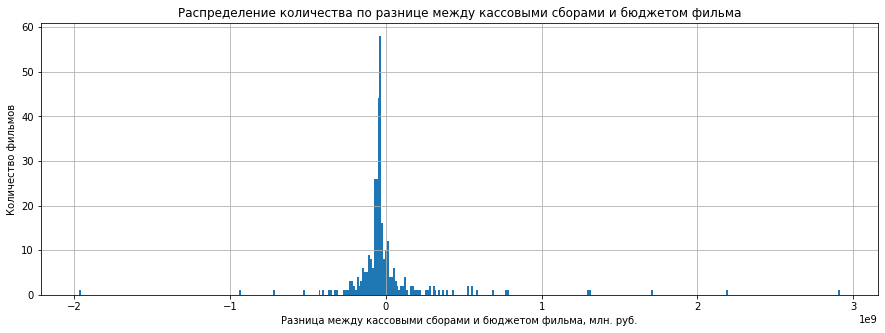

In [292]:
data_support['payback'].hist(figsize=(15,5), bins=400)
plt.xlabel('Разница между кассовыми сборами и бюджетом фильма, млн. руб.')
plt.ylabel('Количество фильмов')
plt.title('Распределение количества по разнице между кассовыми сборами и бюджетом фильма')
plt.show();

В основном кассовые сборы фильмов с гос поддержкой не превышают размер своего бюджета, уходят в минус, есть исключительные случаи, где "убыток" составляет чуть меньше 2 млрд рублей, или, обратная ситуация, где "прибыль" почти 3 млрд. руб., но такие фильмы редкость,   большая часть фильмов ушла в минус примерно на 500 млн.

In [78]:
data_support['proportion'].describe()

count   331.00
mean      0.54
std       0.20
min       0.04
25%       0.38
50%       0.61
75%       0.66
max       1.00
Name: proportion, dtype: float64

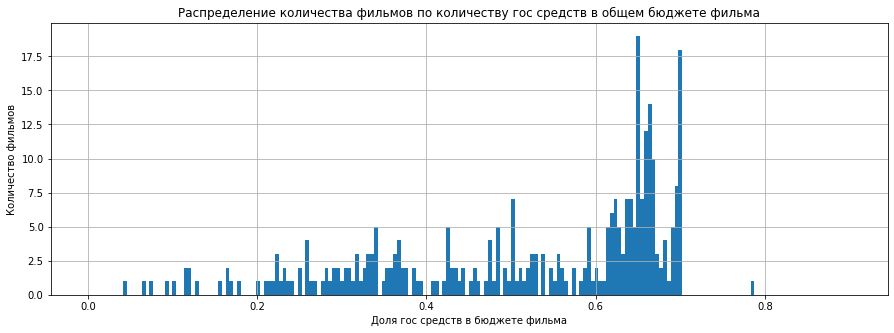

In [293]:
data_support['proportion'].hist(figsize=(15,5), bins = 200, range=(0.001,0.9))
plt.xlabel('Доля гос средств в бюджете фильма')
plt.ylabel('Количество фильмов')
plt.title('Распределение количества фильмов по количеству гос средств в общем бюджете фильма')
plt.show();

Единица - синтетическое значение, не стала его включать в гистограмму, тк не уверена в его достоверности.

Большая часть фильмов имеет от 60% до 70% средств гос поддержки в бюджете фильма.



В данном шаге были исследованы фильмы получившие гос поддержку, проведен сравнительный анализ со всеми стальными фильмами в принципе и сравнительный анализ с российскими фильмами, не получившими гос поддержку.
    
Если сравнивать российские фильмы с гос поддержкой со всеми остальными, то средний рейтинг по годам у фильмов с гос поддержкой ниже, чем у других фильмов (исключение 2013 год).

Если сравнивать только российские фильмы с гос поддержкой и без – здесь ситуация не такая однозначная. В 2013 году средний рейтинг фильмов с гос поддержкой почти на балл выше, чем у фильмов без нее. Также присутствуют годы, где был выше средний рейтинг у фильмов без гос поддержки и наоборот. За 2018 и 2019гг выше рейтинг у фильмов без поддержки.

Основные жанры фильмов с поддержкой – драмы и комедии.

С 2015 года в среднем около 30 фильмов ежегодно в жанре комедия получают гос поддержку.

В основном гос поддержку получают фильмы возрастной категории 16+ и 12+.

Чаще всего фильмы с гос поддержкой не окупаются.



### Шаг 5. Общий вывод

В работе были изученные данные в период с 2010 по 2019гг. 

Количество всего выходивших фильмов за этот период то снижалось, то увеличивалось, в диапазоне 500-900, но количество фильмов, выходивших в прокат, имело тенденцию к росту. Самая высокая доля фильмов, вышедших в прокат, 0,70 – за 2017 год, но при этом в 2017 году самое низкое общее количество вышедших фильмов. После 2017 года доля фильмов, вышедших в прокат, снизилась до 0,54. Самая низкая доля была в 2010 году – 0,11.

С 2012 по 2019 гг наблюдается тенденция к росту кассовых сборов. Максимальная сумма сборов была в 2019 году и составила 48 млрд. руб., а самые низкие сборы из представленных данных были в 2010 году - 2,3 млн. руб.

В проекте были рассчитаны средние и медианные значения кассовых сборов по годам. Медианны значительно ниже средних, это связано с тем, что до 2015 года меньше 40% фильмов выходили в прокат, соответственно, медианное значение для 2010-2014гг - 0, также в последующих годах медиана сильно ниже средней, это связано с неоднородность сборов, какие-то фильмы не собирают сумм даже чтобы покрыть собственные издержки, какие-то окупаются в сотни раз.

В работе было проведено исследование зависимости возрастного ограничения и кассовых сборов за период 2015-2019гг. В 2015 году самые высокие сборы получили фильмы с категорией 12+, самые низкие 0+. В 2016 самые высокие - 16+, низкие - 0+. В 2017 самые высокие - 16+, низкие - 0+. В 2018 самые высокие сборы - 16+, низкие - 0+. В 2019 самые высокие - 6+, низкие -0+. То есть самые низкие сборы всегда у кино 0+, а самые высокие чаще у 16+, но бывают исключения, также стоит отметить, что 3 эти категории (6+, 12+ и 16+) имеют зачастую сопоставимые сборы и их размеры различаются не значительно. 

Также было проведено исследование только фильмов с гос. поддержкой. Средний рейтинг таких фильмов в период 2013-2019гг – 6,0. Когда в то же время средний рейтинг фильмов без гос. поддержки за аналогичный период составил 6,5. Если рассматривать рейтинги этих двух категорий фильмов по годам, то в среднем рейтинг фильмов с гос. поддержкой ниже, чем средний рейтинг без гос. поддержки, только в 2013 году (первый год, по которому у нас есть данные о гос. поддержке) ситуация была обратной.

Если проводить анализ рейтинга только российских фильмов с гос поддержкой и без, то картина следующая: в 2013 году (первый год, о котором у нас есть информация о фильмах с гос поддержкой) рейтинг фильмов, финансируемых государтвом, был значительно выше (на 0,93 балла), чем фильмов без поддержки. В последующие годы такой большой разницы рейтингов не наблюдалось, были годы, где выше средний рейтинг фильмов с гос поддержкой, было и наоборот. За 2018 и 2019гг рейтинг фильмов без гос поддержки был выше, чем фильмов с гос поддержкой на 0,5 и 0,29 соответственно.

В основном фильмы с гос. поддержкой - драмы и комедии. При этом данные комедии имеют самый низкий средний рейтинг по жанрам в фильмах с гос. поддержкой. С 2015 года около 30 фильмов жанра комедия имеют гос поддержку, суммарные кассовые сборы по годам имею тенденцию к росту.

Р.Давлетьяров - режисер 5 фильмов, которого получили гос поддержку за исследуемый период. Д.Дьяченко и С.Андреасян - режисеры, по 4 фильма которых получили гос поддержку.

В основном гос. поддержку получают фильмы возрастной категорией 16+ и 12+.

В основном гос. Поддержка составляет 60%-70% от общего бюджета фильма.

В основном кассовые сборы фильмов с гос. поддержкой не превышают размер своего бюджета, уходят в минус, есть исключительные случаи, где "убыток" составляет чуть меньше 2 млрд рублей, или, обратная ситуация, где "прибыль" почти 3 млрд. руб., но такие фильмы редкость, большая часть фильмов ушла в минус примерно на 500 млн.

Таким образом, если мы измеряем интерес зрителя к фильмам с гос. поддержкой в сборах - в основном интерес низкий, так как фильмы не окупаются, если в рейтинге, то интерес к фильмам с гос. поддержкой неоднозначный и за 2 последних исследованных года был ниже, относительно российских фильмов без поддержки.